<a href="https://colab.research.google.com/github/ShriomiGite/Deep-Learning/blob/main/Thyroid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [23]:
df=pd.read_csv("hypothyroid.csv")
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [24]:
df=df.replace("f",0)

In [25]:
df=df.replace("t",1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   int64 
 3   query on thyroxine         3772 non-null   int64 
 4   on antithyroid medication  3772 non-null   int64 
 5   sick                       3772 non-null   int64 
 6   pregnant                   3772 non-null   int64 
 7   thyroid surgery            3772 non-null   int64 
 8   I131 treatment             3772 non-null   int64 
 9   query hypothyroid          3772 non-null   int64 
 10  query hyperthyroid         3772 non-null   int64 
 11  lithium                    3772 non-null   int64 
 12  goitre                     3772 non-null   int64 
 13  tumor                      3772 non-null   int64 
 14  hypopitu

In [27]:
df.sex=df.sex.replace("M",0)
df.sex=df.sex.replace("F",1)

In [7]:
df['referral source'].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [28]:
del df['referral source']

In [29]:
df.TBG.value_counts()

?    3772
Name: TBG, dtype: int64

In [30]:
del df["TBG"]

In [31]:
df=df.drop(df[["FTI","T4U","TT4","T3","TSH"]],axis=1)
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured,binaryClass
0,41,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,P
1,23,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,P
2,46,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,P
3,70,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,P
4,70,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,P


In [33]:
df.sex.value_counts()

1    2480
0    1142
?     150
Name: sex, dtype: int64

In [34]:
df.sex=df.sex.replace("?",np.NaN)

In [35]:
df.sex=df.sex.replace(np.NaN,df.sex.mean())

In [36]:
df.age=df.age.replace("?",np.NaN)


In [37]:
df.age.isnull().sum()

1

In [38]:
df=df.dropna()

In [49]:
from math import floor
df.sex=floor(df.sex.mean())

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3771 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3771 non-null   object
 1   sex                        3771 non-null   int64 
 2   on thyroxine               3771 non-null   int64 
 3   query on thyroxine         3771 non-null   int64 
 4   on antithyroid medication  3771 non-null   int64 
 5   sick                       3771 non-null   int64 
 6   pregnant                   3771 non-null   int64 
 7   thyroid surgery            3771 non-null   int64 
 8   I131 treatment             3771 non-null   int64 
 9   query hypothyroid          3771 non-null   int64 
 10  query hyperthyroid         3771 non-null   int64 
 11  lithium                    3771 non-null   int64 
 12  goitre                     3771 non-null   int64 
 13  tumor                      3771 non-null   int64 
 14  hypopitu

<Axes: xlabel='binaryClass', ylabel='count'>

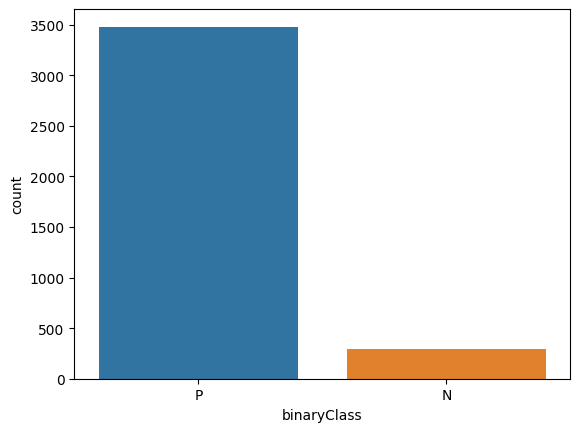

In [81]:
sns.countplot(x="binaryClass",data=df)

In [59]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [60]:
le=LabelEncoder()
y=le.fit_transform(y)

In [61]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [76]:
ann=Sequential()

ann.add(Dense(units=250,activation="tanh"))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=150,activation="tanh"))
ann.add(Dropout(rate=0.4))

ann.add(Dense(units=70,activation="tanh"))
ann.add(Dropout(rate=0.3))

ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [77]:
#to add early stopping for getting less error points
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=30)
ann.fit(xtrain,ytrain,epochs=300,validation_data=(xtest,ytest),callbacks=earlystop,batch_size=62)

Epoch 1/300
43/43 [==============================] - 2s 10ms/step - loss: 0.5042 - accuracy: 0.7685 - val_loss: 0.3406 - val_accuracy: 0.8816
Epoch 2/300
43/43 [==============================] - 0s 6ms/step - loss: 0.3089 - accuracy: 0.9019 - val_loss: 0.3088 - val_accuracy: 0.9081
Epoch 3/300
43/43 [==============================] - 0s 6ms/step - loss: 0.2814 - accuracy: 0.9227 - val_loss: 0.3157 - val_accuracy: 0.9081
Epoch 4/300
43/43 [==============================] - 0s 6ms/step - loss: 0.2649 - accuracy: 0.9250 - val_loss: 0.3136 - val_accuracy: 0.9081
Epoch 5/300
43/43 [==============================] - 0s 6ms/step - loss: 0.2637 - accuracy: 0.9250 - val_loss: 0.3254 - val_accuracy: 0.9081
Epoch 6/300
43/43 [==============================] - 0s 7ms/step - loss: 0.2579 - accuracy: 0.9265 - val_loss: 0.3251 - val_accuracy: 0.9081
Epoch 7/300
43/43 [==============================] - 0s 6ms/step - loss: 0.2665 - accuracy: 0.9242 - val_loss: 0.3249 - val_accuracy: 0.9081
Epoch 8/300


In [78]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.head()

,loss,accuracy,val_loss,val_accuracy
0,0.504230,0.768473,0.340595,0.881625
1,0.308892,0.901857,0.308808,0.908127
2,0.281442,0.922698,0.315702,0.908127
3,0.264894,0.924972,0.313650,0.908127
4,0.263734,0.924972,0.325444,0.908127


<Axes: >

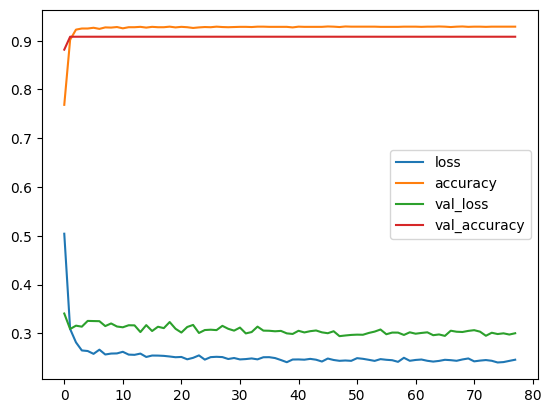

In [79]:
lossdf.plot()

In [82]:
ypred=ann.predict(xtest)

36/36 [==============================] - 0s 5ms/step


In [84]:
dic={"Actual Y":ytest,"Predicted Y":ypred.flatten()}
df1=pd.DataFrame(dic)

<Axes: xlabel='Actual Y', ylabel='Predicted Y'>

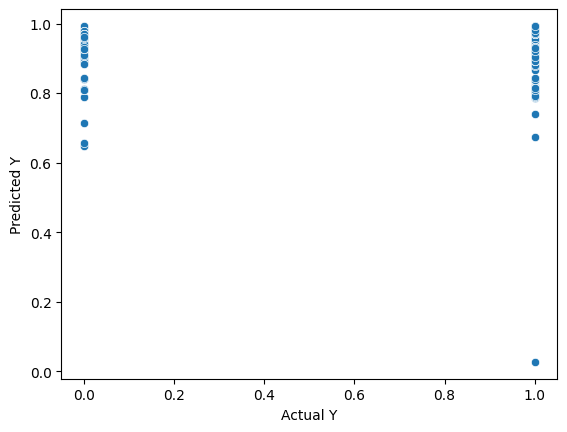

In [85]:
sns.scatterplot(x="Actual Y",y="Predicted Y",data=df1)